In [434]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Data

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

This dataset provides the customer information. It includes 41188 records and 21 fields.

In [463]:
import boto3
import json
import bson
#from bson import json_util
import math
import re

pd.options.display.max_colwidth = 999
pd.options.display.max_rows = 300
pd.options.display.max_columns = 999

# Bloomingdale
dt = pd.read_csv('newdata_Sep20.csv',encoding = "ISO-8859-1")

In [464]:

#type 1:columns need change from list string into list:  shape, length, sizes
#type 2:columns need change from comma separated into list: curr_color, color_list, gold_quality

In [465]:
list(dt)

['Unnamed: 0',
 'Unnamed: 0.1',
 'popular',
 'page_num',
 'product_num',
 'prod_name',
 'curr_color',
 'price_dis',
 'price_reg',
 'price_range',
 'discount',
 'color_by_price',
 'para_desc',
 'desc_list',
 'total_list',
 'related_search',
 'full_file_name',
 'prod_image',
 'category',
 'sub_category',
 'show_3',
 'desc_list_old',
 'shape',
 'length',
 'sizes',
 'main_material',
 'main_gem',
 'gold_quality',
 'color_list',
 'diamonds_ct',
 'width',
 'diameter',
 'inner_circumference',
 'drop']

In [466]:
dt['shape'][1]

"['moon', 'oval']"

In [467]:
dt['shape'] = dt['shape'].map(lambda x: str(x).replace("'", "").replace("[", "").replace("]", "")).values.tolist()
dt['shape'][1]

'moon, oval'

In [468]:
dd_shape = dt['shape'].str.split('\s*,\s*', expand=True)\
                .stack().str.get_dummies().sum(level=0)
list(dd_shape)

['baguette',
 'bib',
 'box',
 'button',
 'chandelier',
 'channel',
 'choker',
 'collar',
 'colored',
 'conch',
 'curve',
 'cushion',
 'drop',
 'emerald',
 'flag',
 'floral',
 'heart',
 'helix',
 'layer',
 'layered',
 'lobe',
 'marquise',
 'miracle',
 'moon',
 'nautical',
 'omega',
 'oval',
 'pave',
 'pear',
 'princess',
 'prong',
 'rectangular',
 'rope',
 'round',
 'set',
 'snake',
 'sports',
 'square',
 'star',
 'strand',
 'stretch',
 'sun',
 'teardrop',
 'thread',
 'trillion',
 'unknown',
 'wrap']

In [469]:
dd_shape = dd_shape.add_prefix('shape_')
dd_shape

shape_baguette  shape_bib  shape_box  shape_button  shape_chandelier  \
0                  0          0          0             0                 0   
1                  0          0          0             0                 0   
2                  0          0          0             0                 0   
3                  0          0          0             0                 0   
4                  0          0          0             0                 0   
5                  0          0          0             0                 0   
6                  0          0          0             0                 0   
7                  0          0          0             0                 0   
8                  0          0          0             0                 0   
9                  0          0          0             0                 0   
10                 0          0          0             0                 0   
11                 0          0          0             0                 0   
12                 0          0          0             0                 0   
13                 0          0          0             0                 0   
14                 0          0          0             0                 0   
15                 0          0          0             0                 0   
16                 0          0          0             0                 0   
17                 0          0          0             0                 0   
18                 0          0          0             0                 0   
19                 0          0          0             0                 0   
20                 0          0          0             0                 0   
21                 0          0          0             0                 0   
22                 0          0          0             0                 0   
23                 0          0          0             0                 0   
24                 0          0          0             0                 0   
25                 0          0          0             0                 0   
26                 0          0          0             0                 0   
27                 0          0          0             0                 0   
28                 0          0          0             0                 0   
29                 0          0          0             0                 0   
30                 0          0          0             0                 0   
31                 0          0          0             0                 0   
32                 0          0          1             0                 0   
33                 0          0          0             0                 0   
34                 0          0          0             0                 0   
35                 0          0          0             0                 0   
36                 0          0          0             0                 0   
37                 0          0          0             0                 0   
38                 0          0          0             0                 0   
39                 0          0          0             0                 0   
40                 0          0          0             0                 0   
41                 0          0          0             0                 0   
42                 0          0          0             0                 0   
43                 0          0          0             0                 0   
44                 0          0          0             0                 0   
45                 0          0          0             0                 0   
46                 0          0          0             0                 0   
47                 0          0          0             0                 0   
48                 0          0          0             0                 0   
49                 0          0          0             0                 0   
50                 0        

In [470]:
dt['length'] = dt['length'].map(lambda x: str(x).replace("'", "").replace("[", "").replace("]", "")).values.tolist()
dt['sizes'] = dt['sizes'].map(lambda x: str(x).replace("'", "").replace("[", "").replace("]", "")).values.tolist()

In [471]:
dd_length = dt.length.str.split('\s*,\s*', expand=True)\
                .stack().str.get_dummies().sum(level=0)
list(dd_length)

['16"',
 '18"',
 '20"',
 '24"',
 '30"',
 '34"',
 '40"',
 '48"',
 'adjustable',
 'unknown']

In [472]:
dd_length = dd_length.add_prefix('length_')
dd_length

length_16"  length_18"  length_20"  length_24"  length_30"  length_34"  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0           0           0           0           0           0   
3              0           0           0           0           0           0   
4              0           0           0           0           0           0   
5              0           0           0           0           0           0   
6              0           0           0           0           0           0   
7              0           0           0           0           0           0   
8              0           0           0           0           0           0   
9              0           0           0           0           0           0   
10             0           0           0           0           0           0   
11             0           0           0           0           0           0   
12             0           0           0           0           0           0   
13             0           0           1           0           0           0   
14             0           0           0           0           0           0   
15             0           0           0           0           0           0   
16             0           0           0           0           0           0   
17             0           0           0           0           0           0   
18             0           0           0           0           0           0   
19             0           0           0           0           0           0   
20             1           0           0           0           0           0   
21             0           0           0           0           0           0   
22             0           0           0           0           0           0   
23             0           0           0           0           0           0   
24             0           0           0           0           0           0   
25             0           0           0           0           0           0   
26             0           0           0           0           0           0   
27             0           0           0           0           0           0   
28             0           0           0           0           0           0   
29             0           0           0           0           0           0   
30             0           0           0           0           0           0   
31             0           0           0           0           0           0   
32             1           0           0           0           0           0   
33             0           0           0           0           0           0   
34             0           0           0           0           0           0   
35             0           0           0           0           0           0   
36             0           0           0           0           0           0   
37             0           0           0           0           0           0   
38             0           0           0           0           0           0   
39             0           0           0           0           0           0   
40             0           0           0           0           0           0   
41             0           0           0           0           0           0   
42             0           0           0           0           0           0   
43             0           0           0           0           0           0   
44             0           0           0           0           0           0   
45             0           0           0           0           0           0   
46             0           0           0           0           0           0   
47             0           0           0           0           0           0   
48             0           1           0           0           0           0   
49    

In [473]:
dd_sizes = dt.sizes.str.split('\s*,\s*', expand=True)\
                .stack().str.get_dummies().sum(level=0)
list(dd_sizes)

['large', 'medium', 'small', 'unknown']

In [474]:
dd_sizes = dd_sizes.add_prefix('sizes_')
dd_sizes

sizes_large  sizes_medium  sizes_small  sizes_unknown
0               0             1            0              0
1               0             1            0              0
2               0             0            0              1
3               0             0            0              1
4               0             0            0              1
5               0             0            0              1
6               0             0            0              1
7               0             0            0              1
8               0             0            0              1
9               0             0            0              1
10              0             0            0              1
11              0             0            0              1
12              0             0            0              1
13              0             0            0              1
14              0             0            0              1
15              0             0            0              1
16              0             0            0              1
17              0             0            0              1
18              0             0            0              1
19              0             0            0              1
20              0             0            0              1
21              0             0            0              1
22              0             0            0              1
23              0             0            0              1
24              0             0            0              1
25              0             0            0              1
26              0             0            0              1
27              0             0            0              1
28              0             0            0              1
29              0             0            0              1
30              0             0            0              1
31              0             0            0              1
32              0             0            0              1
33              0             0            0              1
34              0             0            0              1
35              0             0            0              1
36              0             0            0              1
37              0             0            0              1
38              0             0            0              1
39              0             0            0              1
40              0             0            0              1
41              0             0            0              1
42              0             0            0              1
43              0             0            0              1
44              1             0            0              0
45              0             0            0              1
46              0             0            1              0
47              0             0            0              1
48              0             0            0              1
49              0             0            0              1
50              0             0            0              1
51              0             0            0              1
52              0             0            0              1
53              0             0            1              0
54              0             0            0              1
55              0             0            0              1
56              0             0            0              1
57              0             0            0              1
58              0             0            0              1
59              0             0            0              1
60              0             0            0              1
61              0             0            0              1
62              1             0            0              0
63              0             1            0              0
64              0             0            1              0
65              0             0            1  

In [475]:
#### method of type 2

In [476]:

dd_color1 = dt.curr_color.str.split('\s*,\s*', expand=True)\
                .stack().str.get_dummies().sum(level=0)
list(dd_color1)


['A',
 'Abalone',
 'Abalone Shell',
 'African Turquoise',
 'Amazonite',
 'Amethyst',
 'April',
 'Aqua',
 'Aqua Apatite',
 'Aqua Drusy',
 'Aquarius',
 'Aubergine',
 'Aurora Borealis',
 'Baby Pink',
 'Beige',
 'Black',
 'Black And',
 'Black Drusy',
 'Black Multi',
 'Black Onyx',
 'Blue',
 'Blue Mix',
 'Blue Sapphire Color Quartz',
 'Blue Topaz',
 'Blush',
 'Brass',
 'Bronze',
 'Brown',
 'Burgundy',
 'Canary',
 'Citrine',
 'Clear',
 'Confetti Multi Glitter',
 'Coral',
 'Cream',
 'Cream Multi',
 'Crystal',
 'Dark Champagne',
 'Deep Blue',
 'Deep Sky Blue',
 'Emerald Dyed Agate',
 'Fuchsia',
 'Fuscha',
 'Fuschia',
 'Garnet',
 'Genuine Black Onyx',
 'Genuine Rose Quartz',
 'Gold',
 'Gold Filigree',
 'Gold Metal',
 'Gp;d',
 'Gray',
 'Gray Blue',
 'Green',
 'Grey',
 'Grey Multi',
 'Gunmetal',
 'Hematite',
 'Hematite Mix',
 'Iridescent',
 'Iridescent Drusy',
 'Ivory',
 'Ivory Pearl',
 'January',
 'Jet',
 'LIGHT GREEN',
 'Labradorite',
 'Labradorite Mix',
 'Labrdorite',
 'Lapis',
 'Lavender',
 '

In [477]:
dd_color1 = dd_color1.add_prefix('color1_')
dd_color1

color1_A  color1_Abalone  color1_Abalone Shell  \
0            0               0                     0   
1            0               0                     0   
2            0               0                     0   
3            0               0                     0   
4            0               0                     0   
5            0               0                     0   
6            0               0                     0   
7            0               0                     0   
8            0               0                     0   
9            0               0                     0   
10           0               0                     0   
11           0               0                     0   
12           0               0                     0   
13           0               0                     0   
14           0               0                     0   
15           0               0                     0   
16           0               0                     0   
17           0               0                     0   
18           0               0                     0   
19           0               0                     0   
20           0               0                     0   
21           0               0                     0   
22           0               0                     0   
23           0               0                     0   
24           0               0                     0   
25           0               0                     0   
26           0               0                     0   
27           0               0                     0   
28           0               0                     0   
29           0               0                     0   
30           0               0                     0   
31           0               0                     0   
32           0               0                     0   
33           0               0                     0   
34           0               0                     0   
35           0               0                     0   
36           0               0                     0   
37           0               0                     0   
38           0               0                     0   
39           0               0                     0   
40           0               0                     0   
41           0               0                     0   
42           0               0                     0   
43           0               0                     0   
44           0               0                     0   
45           0               0                     0   
46           0               0                     0   
47           0               0                     0   
48           0               0                     0   
49           0               0                     0   
50           0               0                     0   
51           0               0                     0   
52           0               0                     0   
53           0               0                     0   
54           0               0                     0   
55           0               0                     0   
56           0               0                     0   
57           0               0                     0   
58           0               0                     0   
59           0               0                     0   
60           0               0                     0   
61           0               0                     0   
62           0               0                     0   
63           0               0                     0   
64           0               0                     0   
65           0               0                     0   
66           0               0                     0   
67           0               0                     0   
68           0               0                     0   
69           0               0                     0   
70           0               0

In [478]:
dd_color1.shape

(4525, 178)

In [479]:
dt.color_list = dt.loc[:,'color_list'].apply(lambda s: re.sub("set()","unknown", s))

In [480]:
dd_color2 = dt.color_list.str.split('\s*,\s*', expand=True)\
                .stack().str.get_dummies().sum(level=0)
list(dd_color2)

['black',
 'blue',
 'gold',
 'gray',
 'green',
 'multi',
 'opal',
 'orange',
 'pink',
 'red',
 'rose gold',
 'silver',
 'sterling silver',
 'unknown()',
 'white',
 'yellow']

In [481]:
dd_color2 = dd_color2.add_prefix('color2_')
dd_color2

color2_black  color2_blue  color2_gold  color2_gray  color2_green  \
0                0            0            1            0             0   
1                0            0            0            0             0   
2                0            0            0            0             0   
3                0            0            0            0             0   
4                0            0            0            0             0   
5                0            0            1            0             0   
6                0            0            0            0             0   
7                0            0            1            0             0   
8                0            0            1            0             0   
9                0            0            1            0             0   
10               0            0            1            0             0   
11               0            0            1            0             0   
12               0            0            1            0             0   
13               0            0            1            0             0   
14               0            1            1            0             0   
15               0            0            1            0             0   
16               0            0            1            0             0   
17               0            0            1            0             0   
18               0            0            1            0             0   
19               0            0            1            0             0   
20               1            0            1            0             0   
21               1            0            1            0             0   
22               0            0            1            0             0   
23               0            0            1            0             0   
24               0            0            1            0             0   
25               0            0            1            0             0   
26               0            0            1            0             0   
27               0            0            1            0             0   
28               0            0            1            0             0   
29               0            0            1            0             0   
30               0            0            1            0             0   
31               0            0            1            0             0   
32               0            0            1            0             0   
33               0            0            1            0             0   
34               0            0            1            0             0   
35               0            0            1            0             0   
36               0            0            1            0             0   
37               0            0            1            0             0   
38               0            0            1            0             0   
39               1            0            1            0             0   
40               0            0            1            0             0   
41               0            0            1            0             0   
42               0            0            1            0             0   
43               0            0            1            0             0   
44               0            0            1            0             0   
45               0            0            1            0             0   
46               0            0            1            0             0   
47               0            0            1            0             0   
48               0            0            1            0             0   
49               0            0            1            0             0   
50               0            0            1            0             0   
51               0            0            1            0             0   
52               0            0

In [482]:
dt.gold_quality.unique()

array(['18k', 'unknown', '18 k', '14 k, 18 k', '14k', '12k', '10k', '24k',
       '23k', '16k, 18k', '12k, 18k', '22k', '18k, 14k', '12k, 14k',
       '14 k'], dtype=object)

In [483]:
dt.gold_quality = dt.loc[:,'gold_quality'].apply(lambda s: re.sub(" ","", s))

In [484]:
dt.gold_quality.unique()

array(['18k', 'unknown', '14k,18k', '14k', '12k', '10k', '24k', '23k',
       '16k,18k', '12k,18k', '22k', '18k,14k', '12k,14k'], dtype=object)

In [485]:
dt.gold_quality[dt.gold_quality=='23k'] ='24k'

C:\Users\Owner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [486]:
dd_gold = dt.gold_quality.str.split('\s*,\s*', expand=True)\
                .stack().str.get_dummies().sum(level=0)
list(dd_gold)

['10k', '12k', '14k', '16k', '18k', '22k', '24k', 'unknown']

In [487]:
dd_gold = dd_gold.add_prefix('gold_')

In [488]:
dd_gold

gold_10k  gold_12k  gold_14k  gold_16k  gold_18k  gold_22k  gold_24k  \
0            0         0         0         0         1         0         0   
1            0         0         0         0         0         0         0   
2            0         0         0         0         0         0         0   
3            0         0         0         0         0         0         0   
4            0         0         0         0         0         0         0   
5            0         0         0         0         1         0         0   
6            0         0         0         0         0         0         0   
7            0         0         1         0         1         0         0   
8            0         0         0         0         1         0         0   
9            0         0         1         0         0         0         0   
10           0         0         1         0         0         0         0   
11           0         0         1         0         0         0         0   
12           0         0         1         0         0         0         0   
13           0         0         1         0         0         0         0   
14           0         0         1         0         0         0         0   
15           0         0         1         0         0         0         0   
16           0         0         1         0         0         0         0   
17           0         0         1         0         0         0         0   
18           0         0         1         0         0         0         0   
19           0         0         1         0         0         0         0   
20           0         0         1         0         0         0         0   
21           0         0         1         0         0         0         0   
22           0         0         1         0         0         0         0   
23           0         0         1         0         0         0         0   
24           0         0         1         0         0         0         0   
25           0         0         1         0         0         0         0   
26           0         0         1         0         0         0         0   
27           0         0         1         0         0         0         0   
28           0         0         1         0         0         0         0   
29           0         0         1         0         0         0         0   
30           0         0         1         0         0         0         0   
31           0         0         1         0         0         0         0   
32           0         0         1         0         0         0         0   
33           0         0         0         0         0         0         0   
34           0         0         1         0         0         0         0   
35           0         0         1         0         0         0         0   
36           0         0         1         0         0         0         0   
37           0         0         1         0         0         0         0   
38           0         0         1         0         0         0         0   
39           0         0         1         0         0         0         0   
40           0         0         1         0         0         0         0   
41           0         0         1         0         0         0         0   
42           0         0         1         0         0         0         0   
43           0         0         1         0         0         0         0   
44           0         0         1         0         0         0         0   
45           0         0         1         0         0         0         0   
46           0         0         1         0         0         0         0   
47           0         0         1         0         0         0         0   
48           0         0         1         0         0         0         0   
49           0         0         1         0         0         0         0   
50           0         0    

In [506]:
data= dt[['popular',
          'product_num',
          'price_dis',
          'price_reg',
          'price_range',
          'category',
          'sub_category',
          'show_3',
          'main_material',
          'main_gem',
          'gold_quality',
          'diamonds_ct',
          'width',
          'diameter',
          'inner_circumference',
          'drop']]

In [507]:
print(data.shape)
data1 = data.dropna()
print(data1.shape)
print(list(data.columns))

(4526, 16)
(3719, 16)
['popular', 'product_num', 'price_dis', 'price_reg', 'price_range', 'category', 'sub_category', 'show_3', 'main_material', 'main_gem', 'gold_quality', 'diamonds_ct', 'width', 'diameter', 'inner_circumference', 'drop']


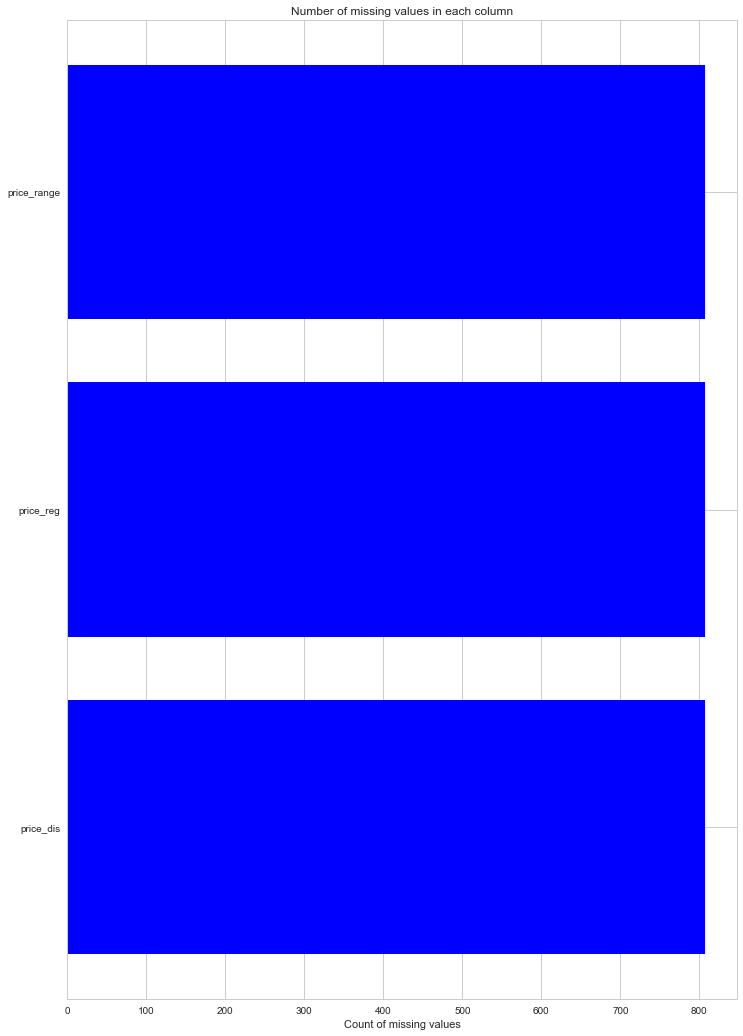

In [508]:
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [509]:
data['dis'] = data.apply(lambda x : 1 if x['price_dis'] == x['price_reg'] else 0, axis=1)

C:\Users\Owner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Input variables

y - popular (whether show up in top 1500)

y2 - show_3 (whether still show up after 3 days: 1- still available; 0 - not available)

1 - dis: （whether it is discounted）

2 - category: (categorical: 'earrings', 'bracelets', 'necklaces', 'rings', 'anklet', 'pin', 'cufflink')

3 - sub-category : (categorical: 'hoop', 'charm', 'drop & chandelier', 'unknown', 'pendant', 'stud', 'stackables & sets', 'lariat', 'band', 'cocktail & statement', 'jacket, climber & cuff', 'chain', 'link', 'bangle & cuff', 'anklet', 'beaded', 'wrap', 'tennis', 'clip on', 'choker')

4 - main_material (categorical: 'beads', 'silver', 'yellow gold', 'rose gold', 'white gold', 'metal', 'plastic', 'stainless steel', 'fabric', 'leather', 'unknown')

5 - main_gem: (categorical: 'unknown', 'diamond', 'pearl', 'crystal', 'cubic zirconia', 'opal','onyx', 'turquoise', 'lapis', 'amethyst', 'mother-of-pearl', 'glass', 'agate', 'moonstone', 'labradorite', 'lapis lazuli','pyrite', 'turquoise', 'unknown')

6 - diamonds_ct: (need to change to numeric: size of diamonds)

7 - width: (need to change to numeric: size of the item)

8 - diameter: (need to change to numeric: diameter of the item))

9 - inner_circumference: (numeric: inner_circumference of the item))

10 - drop: (numeric: drop of the item))

One hot encoded: separated by comma

11 - shape: (categorical: multi shapes set)

12 - length: (categorical: multi length set - 16,18,20,24,30,34,40,48,adjustable)

13 - sizes: (categorical: multi sizes set - ['medium']", "['unknown']", "['large']", "['small']")

14 - gold(gold_quality): (categorical: '10','12', '14', 18', 'unknown','24')

15 - color1(curr_color): (categorical: color show on the website) *

16 - color2(color_list): (categorical: multi colors shown in description) *



#### Predict variable (desired target):

y - has this item been listed as top 1500? (binary: '1','0')

In [510]:
data.diameter.unique()

array(['2.25', '1.25', '0', '0.4', '0.25', '75', '1.9', '25', '38', '1',
       '2.5', '2.31, 2.56', '12', '0.5', '2.38', '2.6', '1.75', '1.03',
       '2.1', '2.4', '0.95', '2.14', '3', '2', '3.5', '2.15', '2.3',
       '5.25', '0.35', '0.3', '0.75', '1.2', '0.8', '1.5', '2.55', '0.38',
       '0.375', '1.63', '0.26', '2.01', '0.6', '5', '8', '2.2', '2.9',
       '2.07, 2.23', '0.15', '0.07', '0.5, 0.2', "1/4'", '1.85', '1.21',
       '0.13', '1.14', '0.39', '0.63', '1.6', '2.35', '0.7', '0.125',
       '0.575', '1.89', '1.3', '0.2', '3.9', '0.65', '2.75', '1.1',
       '4.75', '1.4', '1.15', '2.31', '6', '2.16', '0.24', '0.16', '4.5',
       '7.25'], dtype=object)

In [511]:
data.diameter[data.diameter.str.contains(",")] = data.diameter[data.diameter.str.contains(",")].apply(lambda x: x.split(",")[0])

C:\Users\Owner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Owner\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Owner\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexin

In [512]:
data.diameter[data.diameter=="1/4'"] =0.25

C:\Users\Owner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Owner\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Owner\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexin

In [513]:
data.diameter = pd.to_numeric(data.diameter)

C:\Users\Owner\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [514]:
data.width.unique()

array(['0', '375', '0.16', '0.3', '0.59', '0.25', '1.5', '0.47',
       '0.79, 1.7', '0.4', '0.79', '0.33', '0.5', '3.5', '0.75', '0.63',
       '0.31', '3.2', '2.5', '1.25', '0.39', '0.7', '1.3', '0.98', '0.9',
       '1.1', '0.45', '0.35', '0.6', '0.69', '0.71', '0.76', '0.95',
       '0.55', '0.38', '0.12', '2.3', '0.56', '0.87', '0.8', '0.88',
       '0.22', '0.49', '0.15', '0.24', '0.67', '2.4', '1.7', '1.2', '0.2',
       '0.125', '0.42', '0.51', '0.28', '0.37', '1.4', '2.25', '2.7',
       '1.27', '0.44', '0.375', '2.2', '0.46', '0.43', '0.99', '0.41',
       '0.83', '0.55, 0.67', '1.29', '0.66'], dtype=object)

In [515]:
data.width[data.width=='0.55, 0.67'] =0.55
data.width[data.width=='0.79, 1.7'] =0.79

C:\Users\Owner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Owner\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Owner\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexin

In [516]:
data.width = pd.to_numeric(data.width)

C:\Users\Owner\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [517]:
data.diamonds_ct.unique()

array(['0', '0.05', '0.1', '0.08', '0.27', '0.09', '0.18', '0.2', '0.03',
       '0.12', '0.02', '0.14', '0.07', '0.01', '0.06', '0.25', '0.11',
       '0.48', '0.065', '0.04', '0.15', '0.05, 0.56', '0.085', '0.134',
       '0.095', '0.16', '0.102', '0.9', '0.72', '0.4', '0.005', '0.035',
       '0.039', '0.5', '0.105', '0.13', '0.016', '0.278', '0.05, 0.06',
       '0.64', '0.8', '0.75', '0.17', '0.21', '0.6', '0.3', '0.39, 0.7',
       '0.5, 0.6', '0.32', '0.42', '0.7', '0.22', '0.408', '0.19'],
      dtype=object)

In [518]:
data.diamonds_ct[data.diamonds_ct=='0.05, 0.56'] =0.56
data.diamonds_ct[data.diamonds_ct=='0.05, 0.06'] =0.06
data.diamonds_ct[data.diamonds_ct=='0.5, 0.6'] =0.6
data.diamonds_ct[data.diamonds_ct=='0.39, 0.7'] =0.7

C:\Users\Owner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Owner\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Owner\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexin

In [519]:
data.diamonds_ct = pd.to_numeric(data.diamonds_ct)

C:\Users\Owner\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [520]:
from pandas.api.types import is_numeric_dtype

is_numeric_dtype(data.diamonds_ct)

True

In [545]:

data.inner_circumference = pd.to_numeric(data.inner_circumference)
data.inner_circumference.unique()

C:\Users\Owner\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


array([0.  , 6.6 , 7.  , 6.25, 5.5 , 6.5 , 8.  , 6.  , 7.5 , 5.  , 9.  ,
       8.5 ])

In [546]:
from pandas.api.types import is_numeric_dtype

is_numeric_dtype(data.inner_circumference)

True

In [555]:


data['drop'].unique()


array([0.  , 1.5 , 1.65, 1.75, 2.5 , 4.5 , 2.1 , 2.25, 1.4 , 1.25, 4.3 ,
       0.75, 2.3 , 3.9 , 0.4 , 0.6 , 0.5 , 0.7 , 0.9 , 1.3 , 2.75, 1.8 ,
       4.75, 0.91, 0.39, 0.59, 1.45, 1.7 , 2.4 , 3.75, 3.5 , 3.8 , 0.8 ,
       1.9 , 1.6 , 2.2 , 2.8 , 1.66, 0.32, 2.13, 1.2 , 2.9 , 1.1 , 0.55,
       1.38, 5.5 , 2.65, 0.3 , 1.88, 0.25, 2.6 ])

test table

In [521]:
data.head()

popular  product_num  price_dis  price_reg  price_range   category  \
0        0           76      120.0      120.0          2.0   Earrings   
1        0           66      130.0      130.0          2.0   Earrings   
2        1           41      325.0      325.0          4.0  Bracelets   
3        0           20      180.0      180.0          2.0  Bracelets   
4        0            2      150.0      150.0          2.0   Earrings   

        sub_category  show_3 main_material main_gem gold_quality  diamonds_ct  \
0               Hoop       1         beads  unknown          18k         0.00   
1               Hoop       1         beads  unknown      unknown         0.00   
2              Charm       0        silver  diamond      unknown         0.05   
3             Beaded       1        silver    pearl      unknown         0.00   
4  Drop & Chandelier       1        silver    pearl      unknown         0.00   

   width  diameter  inner_circumference  drop  dis  
0    0.0      2.25                  0.0   0.0    1  
1    0.0      1.25                  0.0   0.0    1  
2    0.0      0.00                  0.0   0.0    1  
3    0.0      0.00                  0.0   0.0    1  
4    0.0      0.00                  0.0   0.0    1

In [522]:
data.main_material.head()

0     beads
1     beads
2    silver
3    silver
4    silver
Name: main_material, dtype: object

In [523]:
data.shape

(4526, 17)

### Data exploration

In [524]:
data['popular'].value_counts()

0    3026
1    1500
Name: popular, dtype: int64

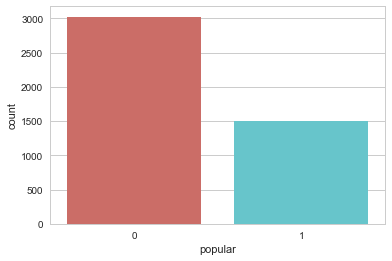

<Figure size 432x288 with 0 Axes>

In [525]:
sns.countplot(x='popular',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

There are 1199 popular items and 2308 unpopular items in the outcome variables.

Let's get a sense of the numbers across the two classes

In [526]:
data.groupby('popular').mean()

product_num   price_dis   price_reg  price_range    show_3  \
popular                                                               
0          48.651685  161.872274  174.773135     1.762575  0.959683   
1          48.040667  138.800462  148.788493     1.457050  0.954000   

         diamonds_ct     width  diameter  inner_circumference      drop  \
popular                                                                   
0           0.009442  0.170362  0.191304             0.235360  0.061913   
1           0.009360  0.030647  0.340640             0.152833  0.116267   

            dis  
popular          
0        0.7039  
1        0.7180

Observations:

The average age of customers who bought the term deposit is higher than that of the customers who didn't.
The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [527]:
data.groupby('category').mean()

popular  product_num   price_dis   price_reg  price_range  \
category                                                                
Anklet     0.500000    47.500000  414.375000  473.750000     4.250000   
Bracelets  0.300923    47.714691  132.568105  136.795232     1.378216   
Cufflink   0.000000    72.000000  275.000000  275.000000     3.000000   
Earrings   0.377778    48.946199  133.334009  154.426847     1.534748   
Necklaces  0.280859    48.561717  199.090867  210.160064     2.113490   
Pin        0.200000    51.200000  287.500000  287.500000     2.750000   
Rings      0.404412    48.474265  196.000000  196.185950     1.921488   
cufflinks  0.000000    73.000000  225.000000  225.000000     3.000000   

             show_3  diamonds_ct     width  diameter  inner_circumference  \
category                                                                    
Anklet     1.000000     0.003000  0.000000  0.000000             0.000000   
Bracelets  0.931157     0.007791  0.067161  0.401817             0.664620   
Cufflink   1.000000     0.000000  0.870000  0.000000             0.000000   
Earrings   0.974854     0.007735  0.230754  0.288365             0.000000   
Necklaces  0.966905     0.011894  0.047160  0.025564             0.004472   
Pin        1.000000     0.000000  0.000000  0.000000             0.000000   
Rings      0.948529     0.018676  0.065588  0.007353             0.000000   
cufflinks  1.000000     0.000000  0.830000  0.000000             0.000000   

               drop       dis  
category                       
Anklet     0.000000  0.300000  
Bracelets  0.000000  0.782115  
Cufflink   0.000000  1.000000  
Earrings   0.192222  0.622222  
Necklaces  0.029562  0.707513  
Pin        0.000000  0.800000  
Rings      0.000000  0.886029  
cufflinks  0.000000  1.000000

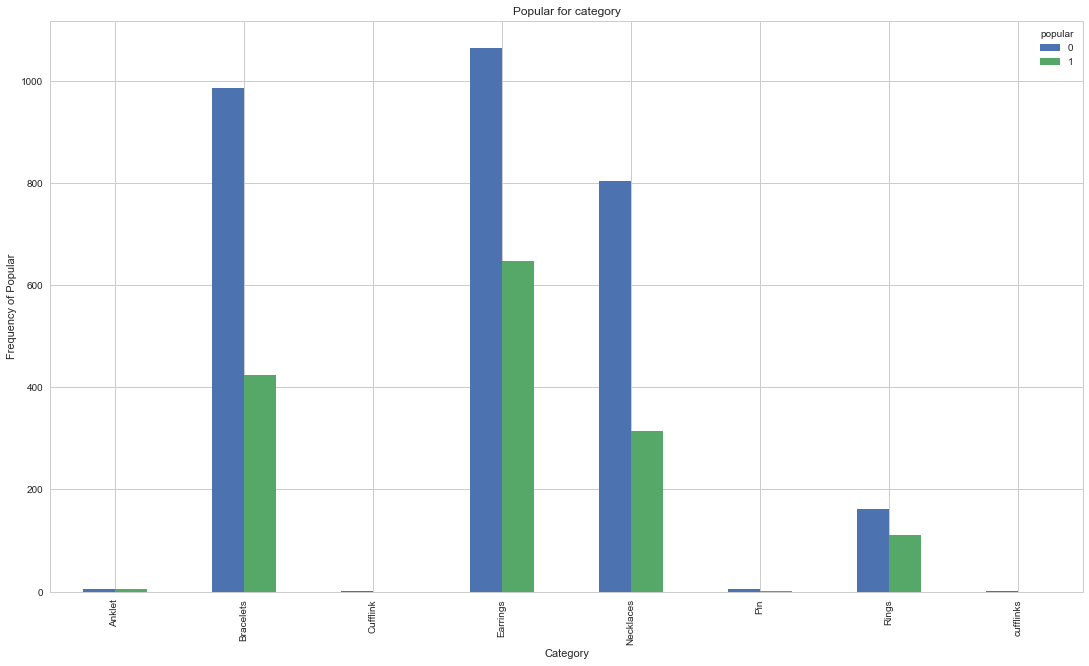

In [528]:
%matplotlib inline
pd.crosstab(data.category,data.popular).plot(kind='bar')
plt.title('Popular for category')
plt.xlabel('Category')
plt.ylabel('Frequency of Popular')
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.savefig('Popular for category')

In [529]:
data.groupby('sub_category').mean()

popular  product_num   price_dis   price_reg  \
sub_category                                                            
Anklet                  0.000000    36.000000  575.000000  575.000000   
Band                    0.372549    49.549020  140.781250  141.250000   
Bangle & Cuff           0.334895    50.093677  174.658595  175.956522   
Beaded                  0.350427    45.675214  176.380227  180.522727   
Chain                   0.310811    41.074324  240.027934  253.950413   
Charm                   0.256296    45.416296   91.909887   92.632258   
Chian                   0.000000    11.000000         NaN         NaN   
Choker                  0.000000     5.000000   88.000000   88.000000   
Clip On                 0.433962    51.301887   96.516304   98.717391   
Cocktail & Statement    0.378947    48.331579  196.587848  202.721519   
Drop & Chandelier       0.354722    49.102906  131.038376  145.293627   
Hoop                    0.455285    50.639566  134.351195  164.003413   
Jacket, Climber & Cuff  0.297872    41.319149  163.126190  186.714286   
Lariat                  0.254386    53.140351  259.069474  267.821053   
Link                    0.421053    49.631579  132.758525  152.557213   
Pendant                 0.273179    49.711921  189.090161  200.338353   
Stackables & Sets       0.576271    45.406780  207.706897  215.379310   
Stud                    0.353222    47.431981  136.110152  159.772727   
Tennis                  0.333333    55.142857  144.654118  147.294118   
Wrap                    0.434783    52.347826  141.592857  148.628571   
unknown                 0.236842    50.469298  231.891307  257.644472   
wrap                    0.000000    67.500000   55.000000   55.000000   

                        price_range    show_3  diamonds_ct     width  \
sub_category                                                           
Anklet                     5.000000  1.000000     0.000000  0.000000   
Band                       1.656250  0.960784     0.012353  0.015294   
Bangle & Cuff              1.561873  0.969555     0.014005  0.121944   
Beaded                     2.056818  0.965812     0.000000  0.123077   
Chain                      2.520661  0.972973     0.013554  0.009122   
Charm                      0.991935  0.899259     0.006479  0.013022   
Chian                           NaN  1.000000     0.000000  0.000000   
Choker                     1.000000  1.000000     0.000000  0.000000   
Clip On                    0.956522  1.000000     0.000000  0.022642   
Cocktail & Statement       1.936709  0.931579     0.012132  0.083316   
Drop & Chandelier          1.426404  0.963680     0.003232  0.010593   
Hoop                       1.549488  0.975610     0.009648  0.012737   
Jacket, Climber & Cuff     1.880952  1.000000     0.014255  0.021702   
Lariat                     2.431579  0.982456     0.020658  0.051316   
Link                       1.524590  0.934211     0.000000  0.067500   
Pendant                    2.032129  0.968543     0.012526  0.072144   
Stackables & Sets          2.172414  0.966102     0.022034  0.016102   
Stud                       1.696970  0.988067     0.014539  0.009356   
Tennis                     1.764706  1.000000     0.000000  0.052381   
Wrap                       1.714286  0.826087     0.003261  0.173913   
unknown                    2.552764  0.978070     0.010197  1.681096   
wrap                       1.000000  1.000000     0.000000  0.000000   

                        diameter  inner_circumference      drop       dis  
sub_category                                                               
Anklet                  0.000000             0.000000  0.000000  1.000000  
Band                    0.000000             0.000000  0.000000  0.931373  
Bangle & Cuff           0.998665             1.797892  0.000000  0.672131  
Beaded                  0.200000             0.655983  0.000000  0.675214  
Chain                   0.000000             0.000000  0.000000  0.722973  
Charm      

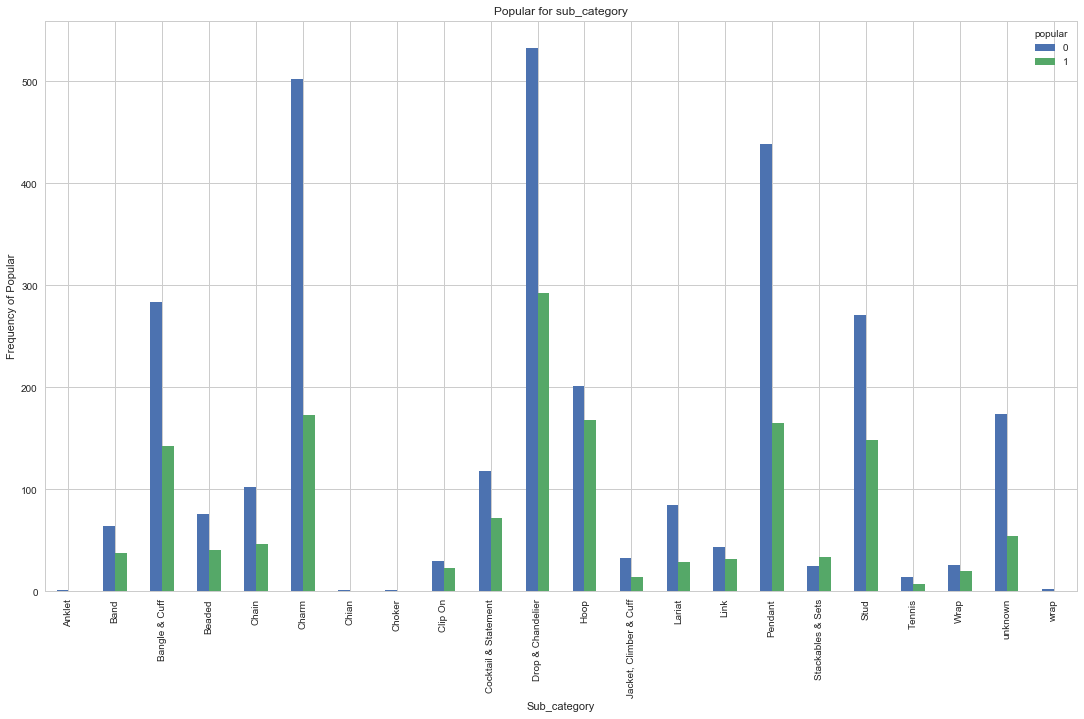

In [530]:
%matplotlib inline
pd.crosstab(data.sub_category,data.popular).plot(kind='bar')
plt.title('Popular for sub_category')
plt.xlabel('Sub_category')
plt.ylabel('Frequency of Popular')
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.savefig('Popular for sub_category')

In [531]:
data.groupby('main_material').mean()

popular  product_num   price_dis   price_reg  price_range  \
main_material                                                                 
beads            0.390244    51.951220   89.456500   94.112500     1.050000   
fabric           0.333333    43.298246  125.742564  134.358974     1.461538   
leather          0.214286    36.857143  146.015385  161.230769     2.076923   
metal            0.423611    51.502315   85.589420   92.021577     0.888393   
plastic          0.368794    50.645390   70.391500   75.520000     0.690000   
rose gold        0.276596    48.132979  129.188303  142.460606     1.581818   
silver           0.285516    47.805267  108.703074  118.177442     1.288706   
stainless steel  0.340909    47.704545  409.500000  409.500000     3.375000   
unknown          0.857143    44.142857  125.000000  125.000000     1.250000   
white gold       0.333333    48.787879  419.451613  499.870968     4.064516   
yellow gold      0.320099    47.281638  242.182480  259.270867     2.504815   

                   show_3  diamonds_ct     width  diameter  \
main_material                                                
beads            0.967480     0.006504  0.060650  0.286585   
fabric           0.929825     0.000000  0.016842  0.607018   
leather          0.928571     0.010714  0.089286  0.000000   
metal            0.968750     0.000000  0.050926  0.333611   
plastic          0.936170     0.000000  0.071915  0.192057   
rose gold        0.925532     0.013500  0.036170  0.350798   
silver           0.945946     0.005482  0.040797  0.141303   
stainless steel  0.977273     0.127500  0.061818  0.363409   
unknown          1.000000     0.000000  0.000000  0.000000   
white gold       0.969697     0.052121  0.000000  0.324545   
yellow gold      0.967742     0.014816  0.266306  0.253179   

                 inner_circumference      drop       dis  
main_material                                             
beads                       0.235772  0.128862  0.569106  
fabric                      0.122807  0.106140  0.473684  
leather                     0.000000  0.000000  0.857143  
metal                       0.201968  0.151366  0.679398  
plastic                     0.419149  0.040780  0.560284  
rose gold                   0.059840  0.037234  0.776596  
silver                      0.100485  0.065087  0.813583  
stainless steel             2.045455  0.036364  0.727273  
unknown                     1.714286  0.000000  0.571429  
white gold                  0.000000  0.048485  0.484848  
yellow gold                 0.256576  0.061538  0.657568

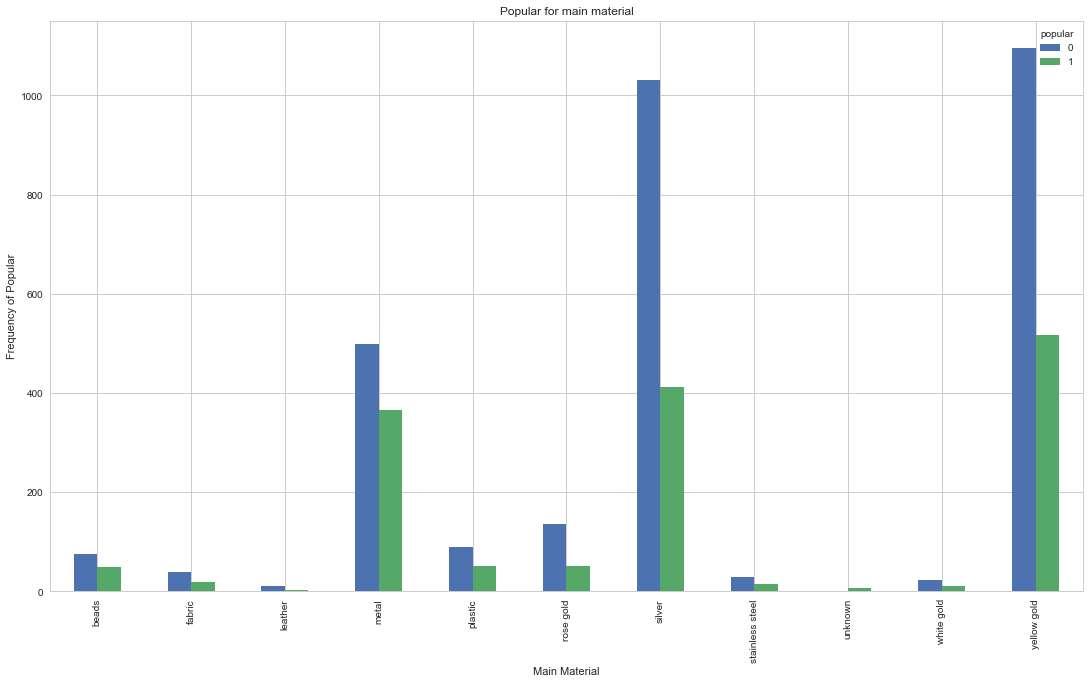

In [532]:
%matplotlib inline
pd.crosstab(data.main_material,data.popular).plot(kind='bar')
plt.title('Popular for main material')
plt.xlabel('Main Material')
plt.ylabel('Frequency of Popular')
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.savefig('Popular for main material')

In [533]:
data.groupby('main_gem').mean()

popular  product_num   price_dis   price_reg  price_range  \
main_gem                                                                      
agate            0.375000    37.937500  160.750000  160.750000     2.000000   
amethyst         0.478261    36.086957  331.142857  391.809524     3.666667   
crystal          0.298413    51.301587  150.420040  152.834008     1.708502   
cubic zirconia   0.303116    48.693107   93.760733   97.351831     1.169811   
diamond          0.372832    45.774566  479.960903  488.801402     4.071651   
glass            0.387324    50.870892   82.145884   89.707317     0.823171   
labradorite      0.340000    51.040000  193.590000  196.285714     2.314286   
lapis            0.500000    47.875000  262.285714  262.285714     2.285714   
lapis lazuli     0.000000    18.500000  196.500000  196.500000     2.500000   
moonstone        0.133333    35.533333  257.583333  258.583333     2.833333   
mother of pearl  0.454545    39.000000  115.611111  136.444444     1.888889   
mother-of-pearl  0.239437    51.887324  121.033333  128.153846     1.384615   
onyx             0.166667    46.500000  244.571429  274.761905     2.809524   
opal             0.275000    49.550000  152.749032  172.161290     1.774194   
pearl            0.363636    46.917355  192.557844  206.931138     2.017964   
pyrite           0.500000    72.250000  217.500000  217.500000     2.500000   
turquoise        0.333333    53.719298  167.208889  179.555556     1.888889   
unknown          0.331361    48.066272  120.066551  139.769846     1.437500   

                   show_3  diamonds_ct     width  diameter  \
main_gem                                                     
agate            1.000000     0.000000  0.000000  0.000000   
amethyst         0.956522     0.055652  0.019565  3.260870   
crystal          0.952381     0.001905  0.063206  0.387111   
cubic zirconia   0.958451     0.003258  0.027441  0.065878   
diamond          0.971098     0.096419  0.018237  0.355751   
glass            0.953052     0.001127  0.040728  0.192300   
labradorite      1.000000     0.000000  0.060000  0.300000   
lapis            1.000000     0.000000  0.303750  0.000000   
lapis lazuli     1.000000     0.000000  0.000000  1.250000   
moonstone        1.000000     0.000000  0.216667  0.166667   
mother of pearl  1.000000     0.000000  0.000000  0.045455   
mother-of-pearl  0.971831     0.000000  0.073521  0.042254   
onyx             0.900000     0.009267  0.008333  0.016667   
opal             0.975000     0.005250  0.085500  0.000000   
pearl            0.986226     0.006129  0.012920  0.121350   
pyrite           1.000000     0.000000  0.000000  0.000000   
turquoise        0.964912     0.005614  0.071930  0.057895   
unknown          0.947929     0.000241  0.273399  0.323538   

                 inner_circumference      drop       dis  
main_gem                                                  
agate                       0.750000  0.000000  0.250000  
amethyst                    0.826087  0.000000  0.652174  
crystal                     0.458730  0.111206  0.736508  
cubic zirconia              0.168555  0.050557  0.767705  
diamond                     0.205202  0.055636  0.884393  
glass                       0.112676  0.140141  0.615023  
labradorite                 0.280000  0.050000  0.660000  
lapis                       0.000000  0.000000  0.875000  
lapis lazuli                0.000000  0.000000  1.000000  
moonstone                   0.400000  0.300000  0.733333  
mother of pearl             0.000000  0.736364  0.454545  
mother-of-pearl             0.084507  0.180986  0.464789  
onyx                        0.166667  0.000000  0.500000  
opal                        0.137500  0.000000  0.625000  
pearl                       0.173829  0.057906  0.815427  
pyrite                      0.000000  0.000000  0.500000  
turquoise                   0.343860  0.164035  0.701754  
unknown                     0.206657  0.080420  0.654438

Visualizations

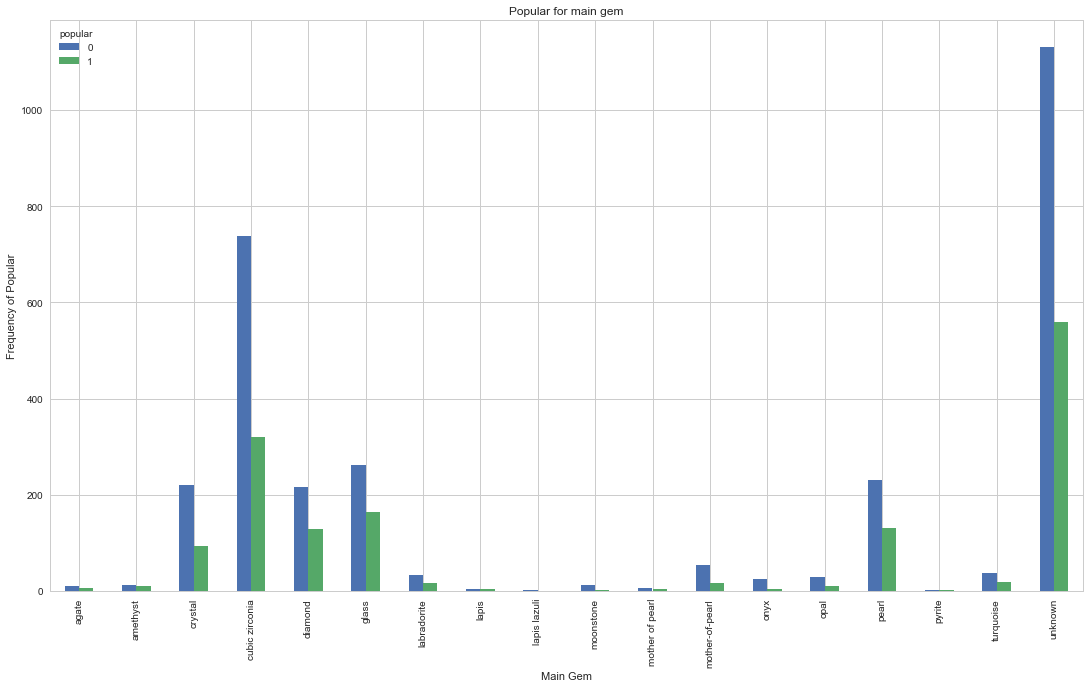

In [534]:
%matplotlib inline
pd.crosstab(data.main_gem,data.popular).plot(kind='bar')
plt.title('Popular for main gem')
plt.xlabel('Main Gem')
plt.ylabel('Frequency of Popular')
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.savefig('Popular for main gem')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

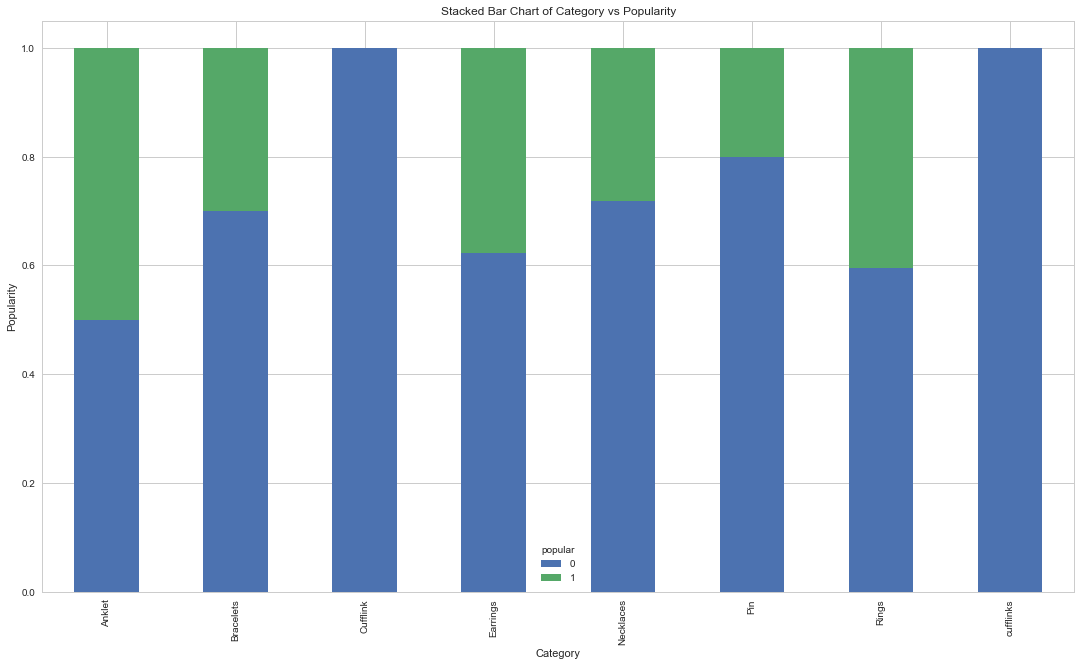

In [535]:
table=pd.crosstab(data.category,data.popular)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Category vs Popularity')
plt.xlabel('Category')
plt.ylabel('Popularity')
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.savefig('Category vs Popularity')

Hard to see, but the marital status does not seem a strong predictor for the outcome variable.

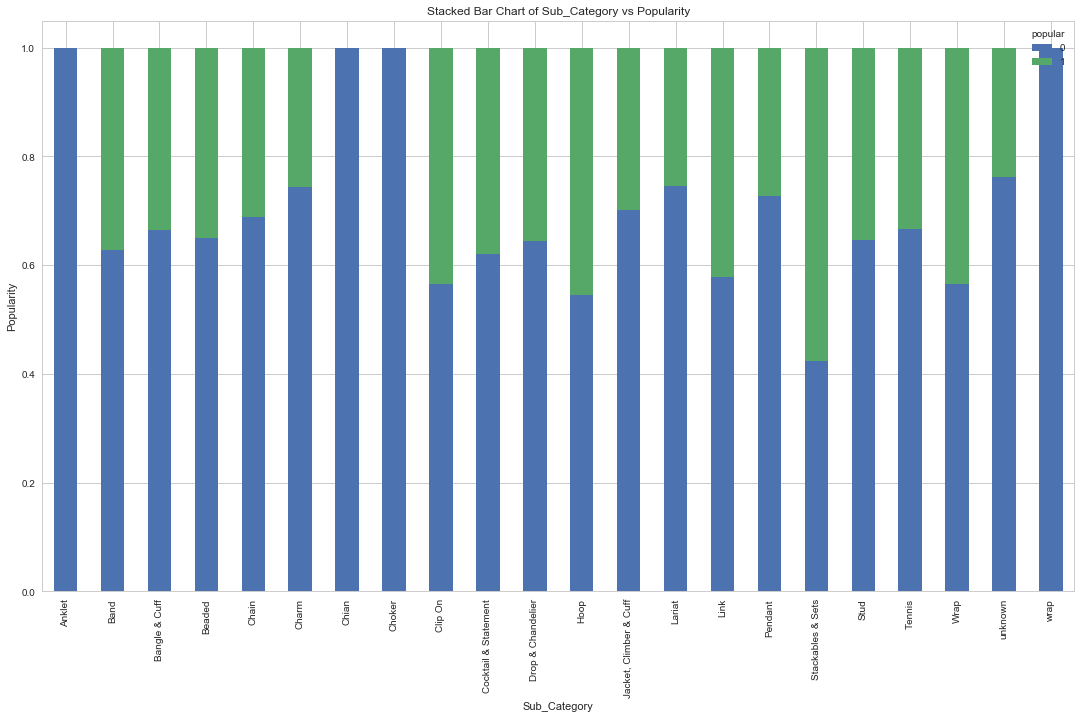

In [536]:
table=pd.crosstab(data.sub_category,data.popular)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Sub_Category vs Popularity')
plt.xlabel('Sub_Category')
plt.ylabel('Popularity')
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.savefig('Sub_Category vs Popularity')

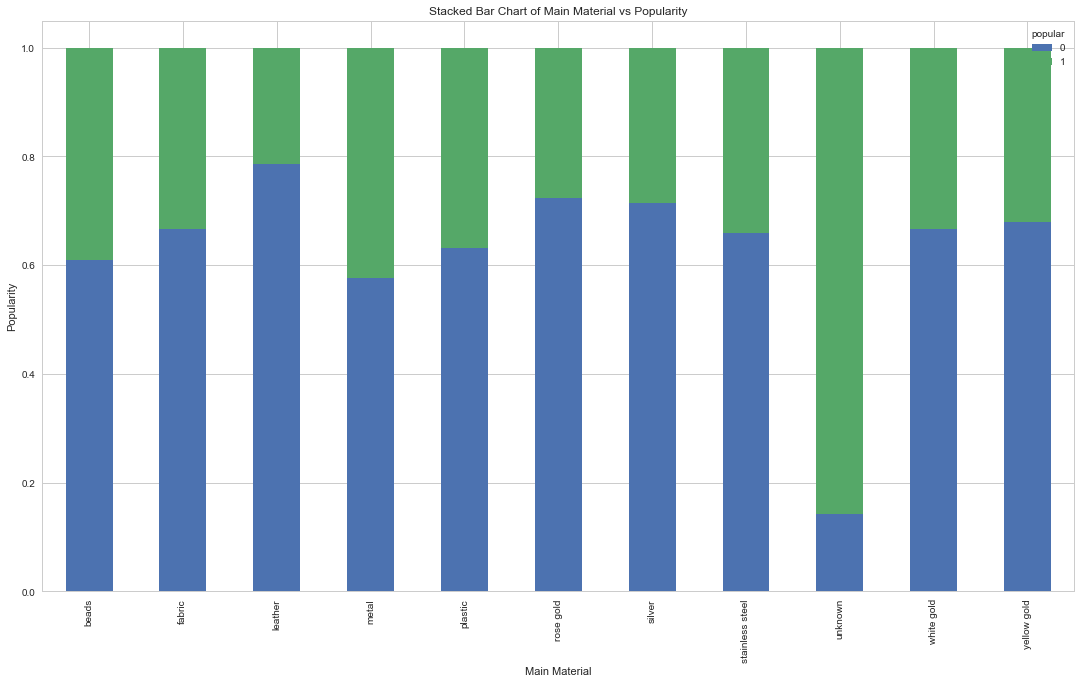

In [537]:
table=pd.crosstab(data.main_material,data.popular)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Main Material vs Popularity')
plt.xlabel('Main Material')
plt.ylabel('Popularity')
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.savefig('Main Material vs Popularity')

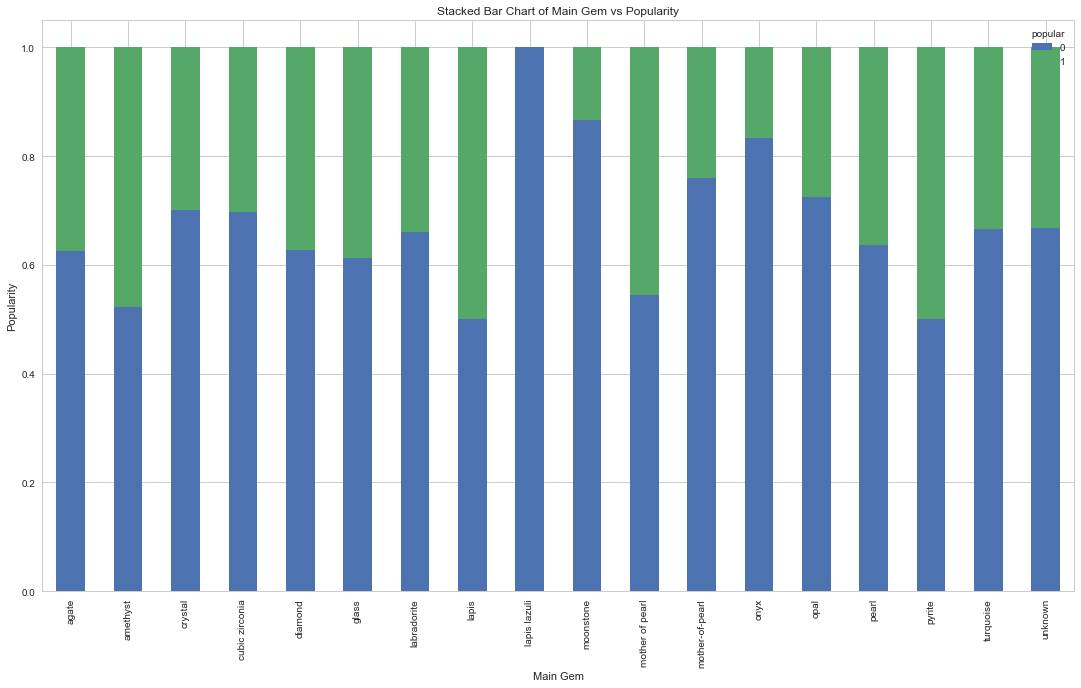

In [538]:
table=pd.crosstab(data.main_gem,data.popular)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Main Gem vs Popularity')
plt.xlabel('Main Gem')
plt.ylabel('Popularity')
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.savefig('Main Gem vs Popularity')

Education seems a good predictor of the outcome variable.

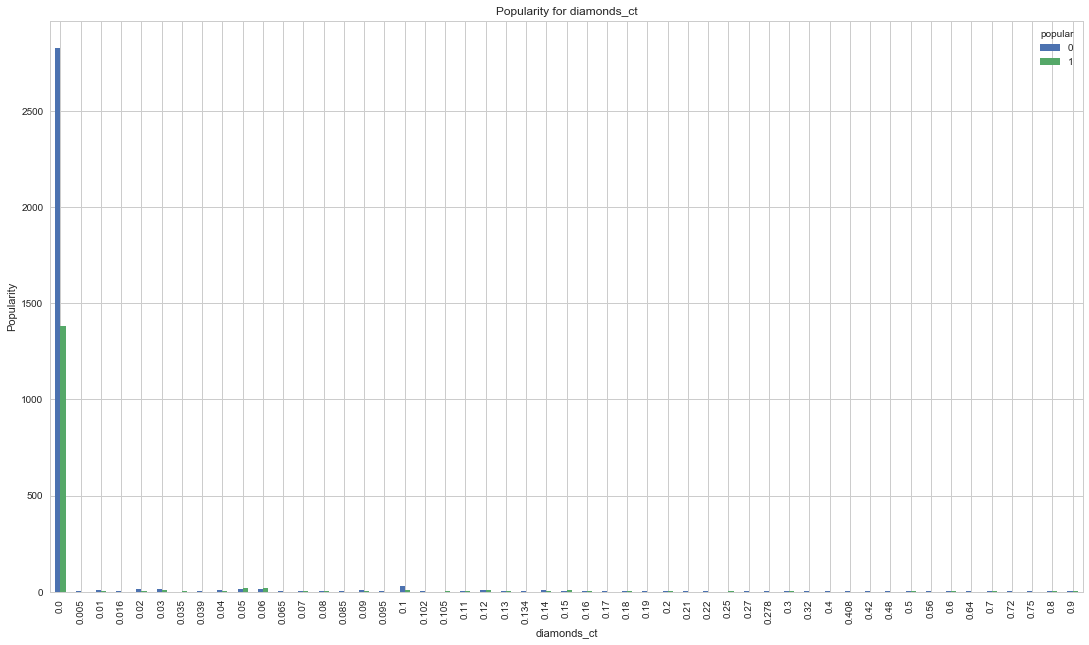

In [539]:
pd.crosstab(data.diamonds_ct,data.popular).plot(kind='bar')
plt.title('Popularity for diamonds_ct')
plt.xlabel('diamonds_ct')
plt.ylabel('Popularity')
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.savefig('Popularity for diamond_ct')

Day of week may not be a good predictor of the outcome

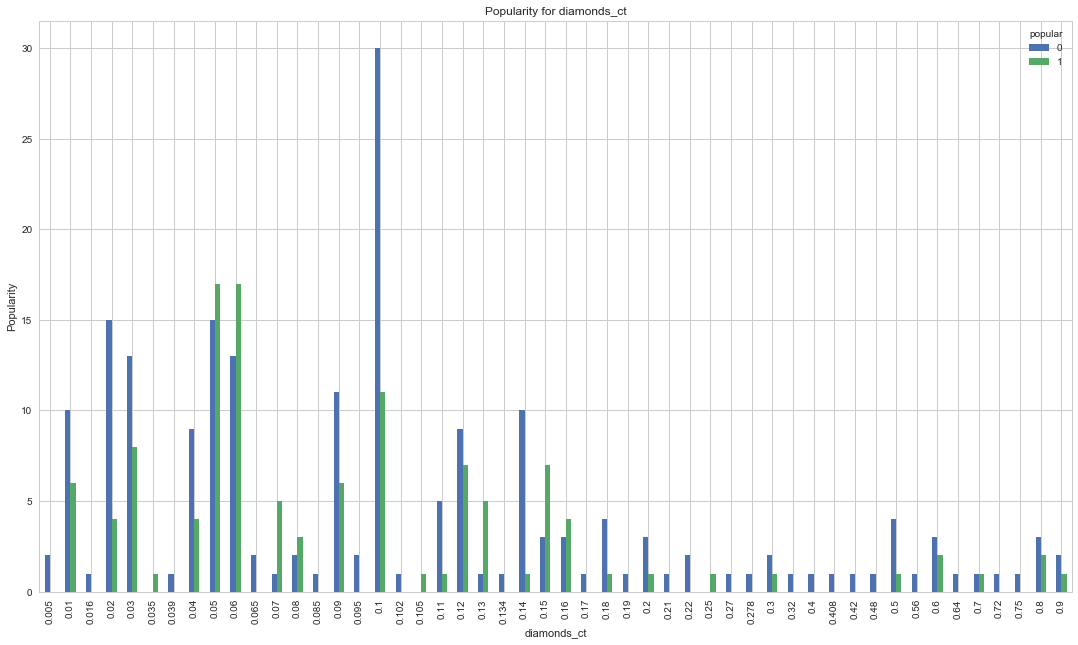

In [540]:
data_test = data[data.diamonds_ct!=0]
pd.crosstab(data_test.diamonds_ct,data_test.popular).plot(kind='bar')
plt.title('Popularity for diamonds_ct')
plt.xlabel('diamonds_ct')
plt.ylabel('Popularity')
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.savefig('Popularity for diamond_ct(with diamond)')

Check numeric variable inner_Circumference

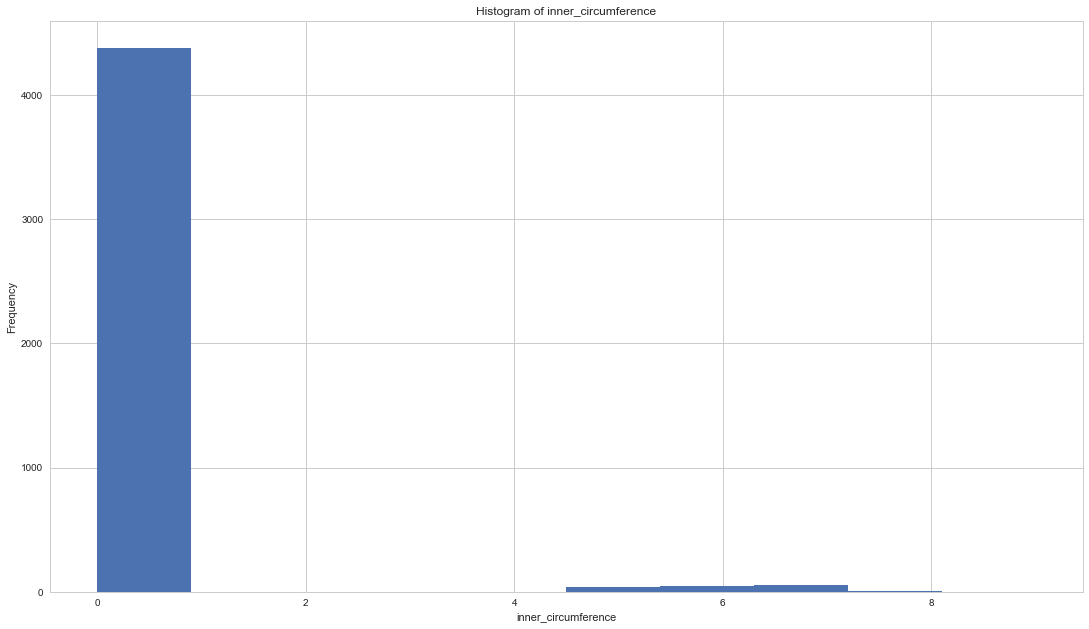

In [542]:
data.inner_circumference.hist()
plt.title('Histogram of inner_circumference')
plt.xlabel('inner_circumference')
plt.ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.savefig('hist_inner_circumference')

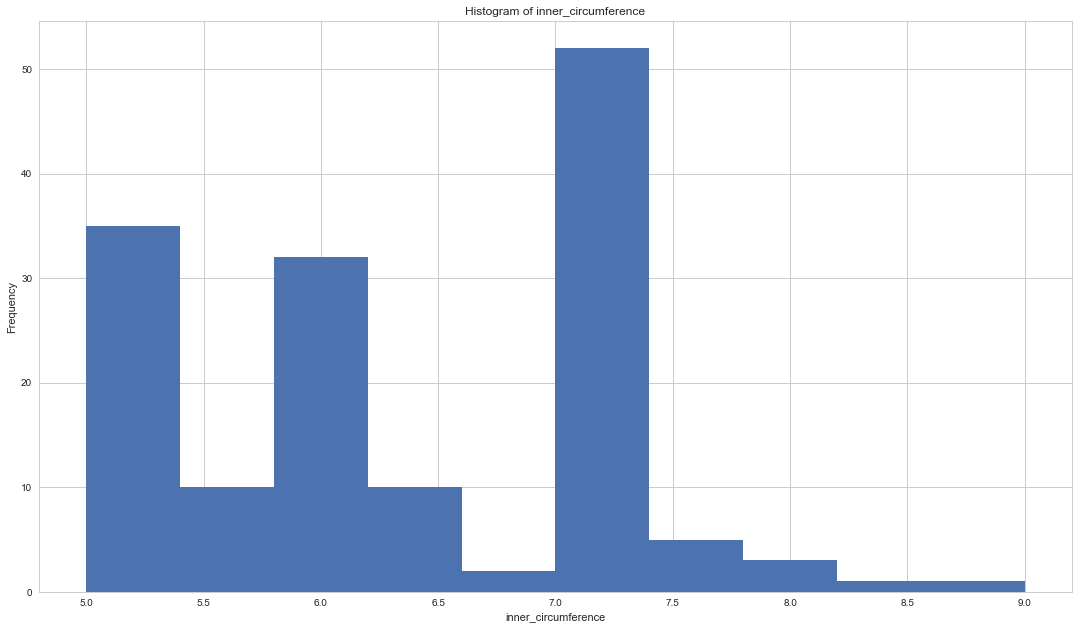

In [548]:
data_test2 = data[data.inner_circumference!=0]
data_test2.inner_circumference.hist()
plt.title('Histogram of inner_circumference')
plt.xlabel('inner_circumference')
plt.ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.savefig('hist_inner_circumference_non_zero')

The most of the customers of the bank in this dataset are in the age range of 30-40.

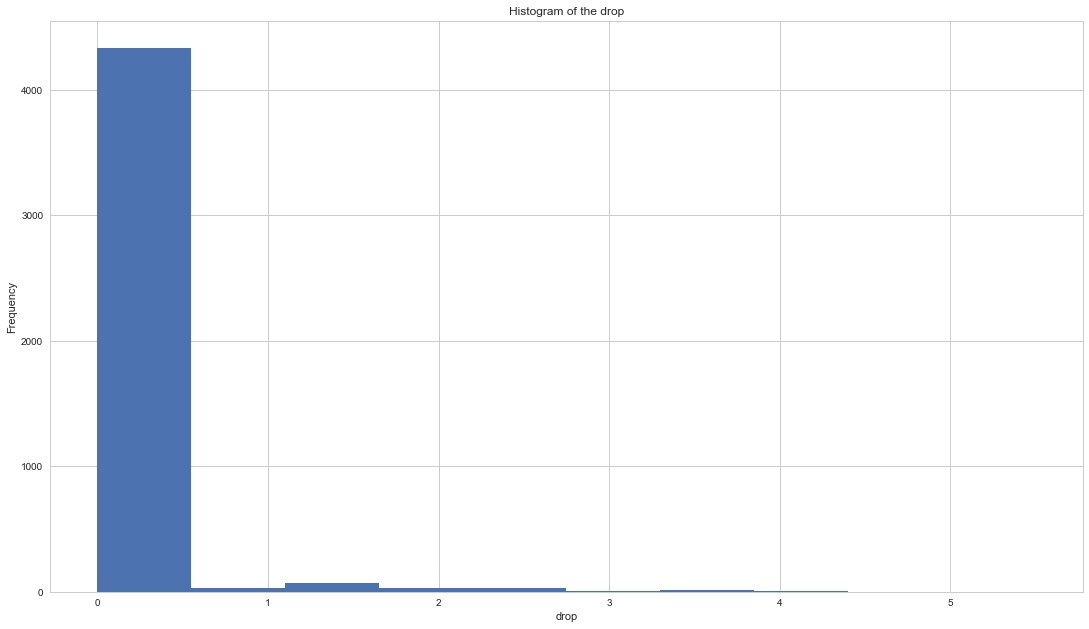

In [556]:
data['drop'].hist()
plt.title('Histogram of the drop')
plt.xlabel('drop')
plt.ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.savefig('hist_drop')

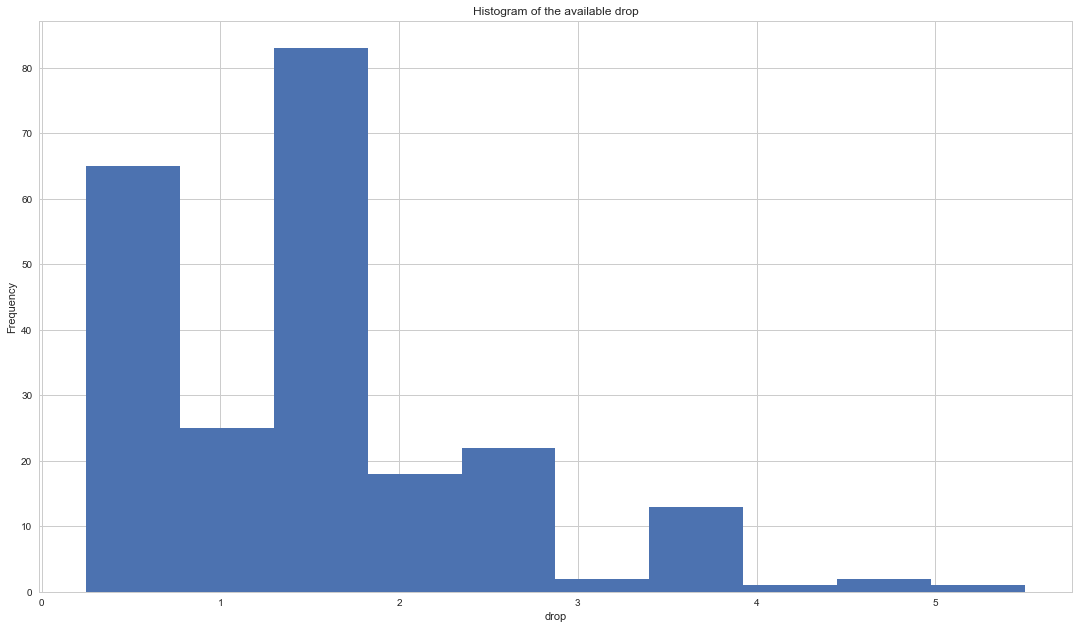

In [557]:
data_test3 = data[data['drop']!=0]
data_test3['drop'].hist()
plt.title('Histogram of the available drop')
plt.xlabel('drop')
plt.ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.savefig('hist_drop_non_zero')

Poutcome seems to be a good predictor of the outcome variable.

### Create and combine dummy variables

In [558]:
list(data)

['popular',
 'product_num',
 'price_dis',
 'price_reg',
 'price_range',
 'category',
 'sub_category',
 'show_3',
 'main_material',
 'main_gem',
 'gold_quality',
 'diamonds_ct',
 'width',
 'diameter',
 'inner_circumference',
 'drop',
 'dis']

In [560]:
# ord_cols = ['price_range']
# range_dic = {0.0: 0, 1.0: 1, 2.0: 2, 3.0:3, 4.0:4, 5.0:5, 6.0:6}

In [566]:
# price_range = data['price_range']

# for item in price_range:
#     price_range[item] = price_range[item].map(lambda x: range_dic.get(x, 0))
# data['price_range'].head()


In [567]:
dfinal = data[['popular',
 'price_dis',
 'price_reg',
 'price_range',
 'category',
 'sub_category',
 'main_material',
 'main_gem',
 'diamonds_ct',
 'width',
 'diameter',
 'inner_circumference',
 'drop',
 'dis']]

In [569]:
cat_vars=['category','sub_category','main_material','main_gem']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(dfinal[var], prefix=var)
    dfinal1=dfinal.join(cat_list)
    dfinal=dfinal1

In [572]:
# cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
# data_vars=data.columns.values.tolist()
to_keep=[i for i in dfinal if i not in cat_vars]

In [573]:
dfinal=data[to_keep]
dfinal.head()

popular  price_dis  price_reg  price_range  diamonds_ct  width  diameter  \
0        0      120.0      120.0          2.0         0.00    0.0      2.25   
1        0      130.0      130.0          2.0         0.00    0.0      1.25   
2        1      325.0      325.0          4.0         0.05    0.0      0.00   
3        0      180.0      180.0          2.0         0.00    0.0      0.00   
4        0      150.0      150.0          2.0         0.00    0.0      0.00   

   inner_circumference  drop  dis  category_Anklet  category_Bracelets  \
0                  0.0   0.0    1                0                   0   
1                  0.0   0.0    1                0                   0   
2                  0.0   0.0    1                0                   1   
3                  0.0   0.0    1                0                   1   
4                  0.0   0.0    1                0                   0   

   category_Cufflink  category_Earrings  category_Necklaces  category_Pin  \
0                  0                  1                   0             0   
1                  0                  1                   0             0   
2                  0                  0                   0             0   
3                  0                  0                   0             0   
4                  0                  1                   0             0   

   category_Rings  category_cufflinks  sub_category_Anklet  sub_category_Band  \
0               0                   0                    0                  0   
1               0                   0                    0                  0   
2               0                   0                    0                  0   
3               0                   0                    0                  0   
4               0                   0                    0                  0   

   sub_category_Bangle & Cuff  sub_category_Beaded  sub_category_Chain  \
0                           0                    0                   0   
1                           0                    0                   0   
2                           0                    0                   0   
3                           0                    1                   0   
4                           0                    0                   0   

   sub_category_Charm  sub_category_Chian  sub_category_Choker  \
0                   0                   0                    0   
1                   0                   0                    0   
2                   1                   0                    0   
3                   0                   0                    0   
4                   0                   0                    0   

   sub_category_Clip On  sub_category_Cocktail & Statement  \
0                     0                                  0   
1                     0                                  0   
2                     0                                  0   
3                     0                                  0   
4                     0                                  0   

   sub_category_Drop & Chandelier  sub_category_Hoop  \
0                               0                  1   
1                               0                  1   
2                               0                  0   
3                               0                  0   
4                               1                  0   

   sub_category_Jacket, Climber & Cuff  sub_category_Lariat  \
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   

   sub_category_Link  sub_category_Pendant  sub_category_Stackables & Sets  \
0                  0                     0                               0   
1                  0                     0    

In [577]:
# data_final_vars=data_final.columns.values.tolist()
# y=['y']
# X=[i for i in data_final_vars if i not in y]
dfinal=dfinal.join(dd_shape)
dfinal=dfinal.join(dd_sizes)
dfinal=dfinal.join(dd_length)
dfinal=dfinal.join(dd_gold)
dfinal=dfinal.join(dd_color1)
dfinal=dfinal.join(dd_color2)


In [578]:
dfinal.shape

(4526, 332)

In [585]:
data_final = dfinal.dropna()

In [586]:
data_final_vars=data_final.columns.values.tolist()
y=['popular']
X=[i for i in data_final_vars if i not in y]

In [589]:
data_final[X].head()

price_dis  price_reg  price_range  diamonds_ct  width  diameter  \
0      120.0      120.0          2.0         0.00    0.0      2.25   
1      130.0      130.0          2.0         0.00    0.0      1.25   
2      325.0      325.0          4.0         0.05    0.0      0.00   
3      180.0      180.0          2.0         0.00    0.0      0.00   
4      150.0      150.0          2.0         0.00    0.0      0.00   

   inner_circumference  drop  dis  category_Anklet  category_Bracelets  \
0                  0.0   0.0    1                0                   0   
1                  0.0   0.0    1                0                   0   
2                  0.0   0.0    1                0                   1   
3                  0.0   0.0    1                0                   1   
4                  0.0   0.0    1                0                   0   

   category_Cufflink  category_Earrings  category_Necklaces  category_Pin  \
0                  0                  1                   0             0   
1                  0                  1                   0             0   
2                  0                  0                   0             0   
3                  0                  0                   0             0   
4                  0                  1                   0             0   

   category_Rings  category_cufflinks  sub_category_Anklet  sub_category_Band  \
0               0                   0                    0                  0   
1               0                   0                    0                  0   
2               0                   0                    0                  0   
3               0                   0                    0                  0   
4               0                   0                    0                  0   

   sub_category_Bangle & Cuff  sub_category_Beaded  sub_category_Chain  \
0                           0                    0                   0   
1                           0                    0                   0   
2                           0                    0                   0   
3                           0                    1                   0   
4                           0                    0                   0   

   sub_category_Charm  sub_category_Chian  sub_category_Choker  \
0                   0                   0                    0   
1                   0                   0                    0   
2                   1                   0                    0   
3                   0                   0                    0   
4                   0                   0                    0   

   sub_category_Clip On  sub_category_Cocktail & Statement  \
0                     0                                  0   
1                     0                                  0   
2                     0                                  0   
3                     0                                  0   
4                     0                                  0   

   sub_category_Drop & Chandelier  sub_category_Hoop  \
0                               0                  1   
1                               0                  1   
2                               0                  0   
3                               0                  0   
4                               1                  0   

   sub_category_Jacket, Climber & Cuff  sub_category_Lariat  \
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   

   sub_category_Link  sub_category_Pendant  sub_category_Stackables & Sets  \
0                  0                     0                               0   
1                  0                     0                               0   
2                  0  

### Feature Selection

In [590]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(data_final[X], data_final[y] )
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Owner\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False  True False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False Fa

In [602]:
features_bool = np.array(rfe.support_)
features = np.array(list(X))
result = features[features_bool]
print(result)

['main_material_unknown' 'main_gem_moonstone' 'shape_channel' 'shape_lobe'
 'shape_rectangular' 'shape_strand' 'color1_Black And' 'color1_Grey'
 'color1_Ivory' 'color1_Matte Lilac' 'color1_Mirage'
 'color1_Mother of Pearl' 'color1_Peach' 'color1_Rafaelian Silver'
 'color1_Rose' 'color1_Silver and Pink' 'color2_multi' 'color2_orange']


['popular',
 'price_dis',
 'price_reg',
 'price_range',
 'diamonds_ct',
 'width',
 'diameter',
 'inner_circumference',
 'drop',
 'dis',
 'category_Anklet',
 'category_Bracelets',
 'category_Cufflink',
 'category_Earrings',
 'category_Necklaces',
 'category_Pin',
 'category_Rings',
 'category_cufflinks',
 'sub_category_Anklet',
 'sub_category_Band',
 'sub_category_Bangle & Cuff',
 'sub_category_Beaded',
 'sub_category_Chain',
 'sub_category_Charm',
 'sub_category_Chian',
 'sub_category_Choker',
 'sub_category_Clip On',
 'sub_category_Cocktail & Statement',
 'sub_category_Drop & Chandelier',
 'sub_category_Hoop',
 'sub_category_Jacket, Climber & Cuff',
 'sub_category_Lariat',
 'sub_category_Link',
 'sub_category_Pendant',
 'sub_category_Stackables & Sets',
 'sub_category_Stud',
 'sub_category_Tennis',
 'sub_category_Wrap',
 'sub_category_unknown',
 'sub_category_wrap',
 'main_material_beads',
 'main_material_fabric',
 'main_material_leather',
 'main_material_metal',
 'main_material_plast

The Recursive Feature Elimination (RFE) has helped us select the following features: "previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", "poutcome_failure", "poutcome_nonexistent", "poutcome_success".

In [604]:
cols=['main_material_unknown', 'main_gem_moonstone', 'shape_channel', 'shape_lobe',
 'shape_rectangular', 'shape_strand', 'color1_Black And', 'color1_Grey',
 'color1_Ivory','color1_Matte Lilac', 'color1_Mirage',
 'color1_Mother of Pearl', 'color1_Peach', 'color1_Rafaelian Silver',
 'color1_Rose', 'color1_Silver and Pink', 'color2_multi', 'color2_orange'] 
X=data_final[cols]
y=data_final[y]

In [609]:
X.shape

(3718, 18)

### Implementing the model

In [608]:
y.shape

(3718, 1)

In [605]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.674319
         Iterations: 35


LinAlgError: Singular matrix

The p-values for most of the variables are very small, therefore, most of them are significant to the model.

### Logistic Regression Model Fitting

In [610]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Owner\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Predicting the test set results and caculating the accuracy

In [611]:
y_pred = logreg.predict(X_test)

In [612]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.68


### Cross Validation

In [613]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.673


C:\Users\Owner\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Owner\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Owner\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Owner\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-v

### Confusion Matrix

In [614]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[749   1]
 [354  12]]


The result is telling us that we have 10872+254 correct predictions and 1122+109 incorrect predictions.

#### Accuracy

In [615]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

NameError: name 'classifier' is not defined

#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [616]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.68      1.00      0.81       750
          1       0.92      0.03      0.06       366

avg / total       0.76      0.68      0.56      1116



#### Interpretation: 

Of the entire test set, 88% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 90% of the customer's preferred term deposit were promoted.

### ROC Curvefrom sklearn import metrics
from ggplot import *

prob = clf1.predict_proba(X_test)[:,1]
fpr, sensitivity, _ = metrics.roc_curve(Y_test, prob)

df = pd.DataFrame(dict(fpr=fpr, sensitivity=sensitivity))
ggplot(df, aes(x='fpr', y='sensitivity')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

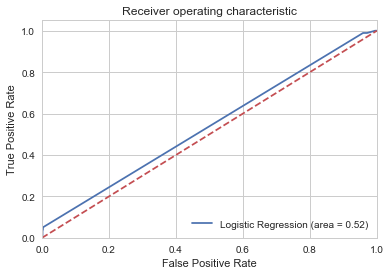

In [617]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()